# Multimodal analysis

Here we will use dual-omics SHARE-seq dataset, more specicially the dataset from figure4 in [SHARE-seq study](https://www.sciencedirect.com/science/article/abs/pii/S0092867420312538), "multiome_ma2020_fig4" as an example to illustrate how SIMBA performs multimodal analysis.

The RNA and ATAC modality will be processed and structured into the graph as in scRNA- and scATAC-seq. In this case, a cell node will have nodes both to genes and peaks.

![title](img/4a.png)

In [1]:
import os
import simba as si
si.__version__

'1.1'

In [2]:
workdir = 'result_multiome_shareseq'
si.settings.set_workdir(workdir)

Saving results in: result_multiome_shareseq


In [3]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [4]:
# to make plots prettier
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/tmp/ipykernel_178460/3381039072.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### load example data

In [5]:
dict_adata = si.datasets.multiome_ma2020_fig4()

In [6]:
dict_adata

{'rna': AnnData object with n_obs × n_vars = 6436 × 20331
     obs: 'celltype',
 'atac': AnnData object with n_obs × n_vars = 6436 × 344592
     obs: 'depth', 'FRIP', 'TSSportion', 'EnhancerPortion', 'atac.barcode', 'rna.barcode', 'atac.umap1', 'atac.umap2', 'celltype', 'rna.umap1', 'rna.umap2'
     var: 'chr', 'start', 'end', 'width', 'strand', 'TSSidx', 'Enhanceridx', 'Gene', 'peaks'}

In [7]:
adata_CP = dict_adata['atac']
adata_CG = dict_adata['rna']

In [8]:
adata_CP.obs.head()

,depth,FRIP,TSSportion,EnhancerPortion,atac.barcode,rna.barcode,atac.umap1,atac.umap2,celltype,rna.umap1,rna.umap2
Trial60.skin.R1.01.R2.06.R3.83.P1.55,8135,0.702274,0.311920,0.265185,Trial60.skin.R1.01.R2.06.R3.83.P1.07,Trial60.skin.R1.01.R2.06.R3.83.P1.55,1.287024,-9.679595,TAC-1,0.801948,-8.777440
Trial60.skin.R1.01.R2.11.R3.86.P1.56,12614,0.709846,0.356489,0.248046,Trial60.skin.R1.01.R2.11.R3.86.P1.08,Trial60.skin.R1.01.R2.11.R3.86.P1.56,1.679156,-8.890386,TAC-1,0.576971,-8.106592
Trial60.skin.R1.01.R2.15.R3.09.P1.55,11424,0.799545,0.334465,0.261222,Trial60.skin.R1.01.R2.15.R3.09.P1.07,Trial60.skin.R1.01.R2.15.R3.09.P1.55,3.105708,-11.200886,TAC-1,-0.170911,-7.537184
Trial60.skin.R1.01.R2.17.R3.81.P1.53,6588,0.802368,0.385736,0.234771,Trial60.skin.R1.01.R2.17.R3.81.P1.05,Trial60.skin.R1.01.R2.17.R3.81.P1.53,1.942233,-9.400400,TAC-1,0.778544,-8.332716
Trial60.skin.R1.01.R2.18.R3.95.P1.54,7796,0.733710,0.321154,0.259790,Trial60.skin.R1.01.R2.18.R3.95.P1.06,Trial60.skin.R1.01.R2.18.R3.95.P1.54,0.205076,-10.888144,TAC-1,1.867226,-6.767437


In [9]:
adata_CG.obs.head()

,celltype
Trial60.skin.R1.01.R2.06.R3.83.P1.55,TAC-1
Trial60.skin.R1.01.R2.11.R3.86.P1.56,TAC-1
Trial60.skin.R1.01.R2.15.R3.09.P1.55,TAC-1
Trial60.skin.R1.01.R2.17.R3.81.P1.53,TAC-1
Trial60.skin.R1.01.R2.18.R3.95.P1.54,TAC-1


## ATAC-seq part

### preprocessing

In [10]:
si.pp.filter_peaks(adata_CP,min_n_cells=3)

Before filtering: 
6436 cells, 344592 peaks
Filter peaks based on min_n_cells
After filtering out low-expressed peaks: 
6436 cells, 332987 peaks


In [12]:
si.pp.cal_qc_atac(adata_CP)

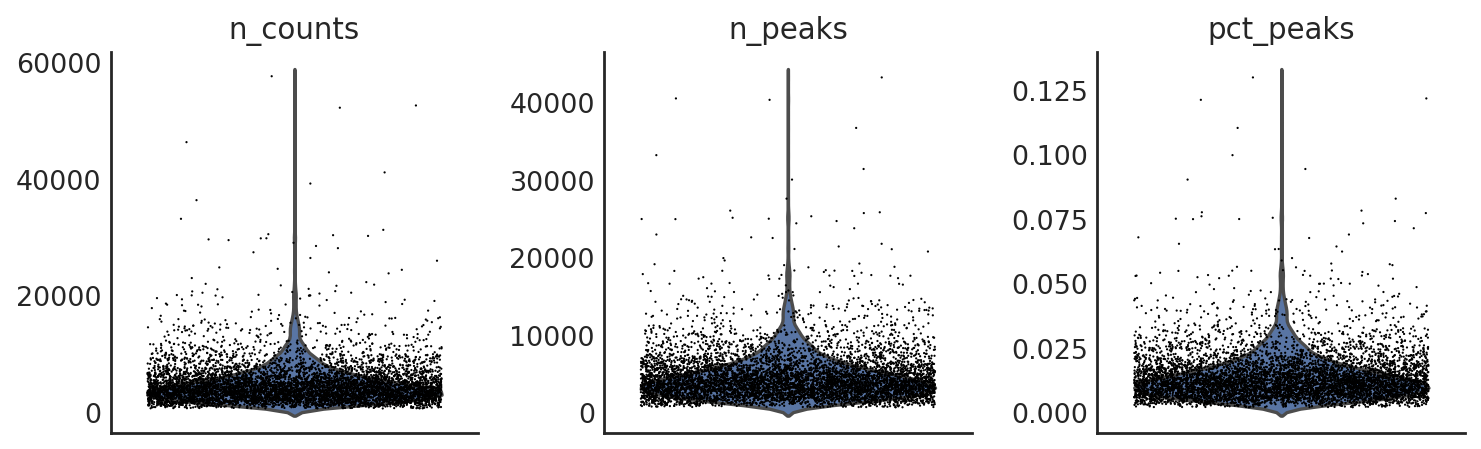

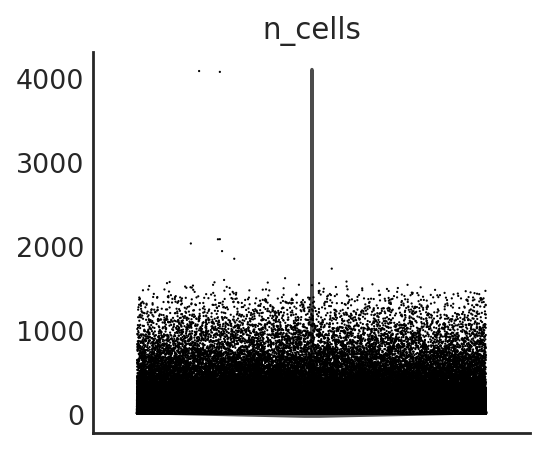

In [13]:
si.pl.violin(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], list_var=['n_cells'])

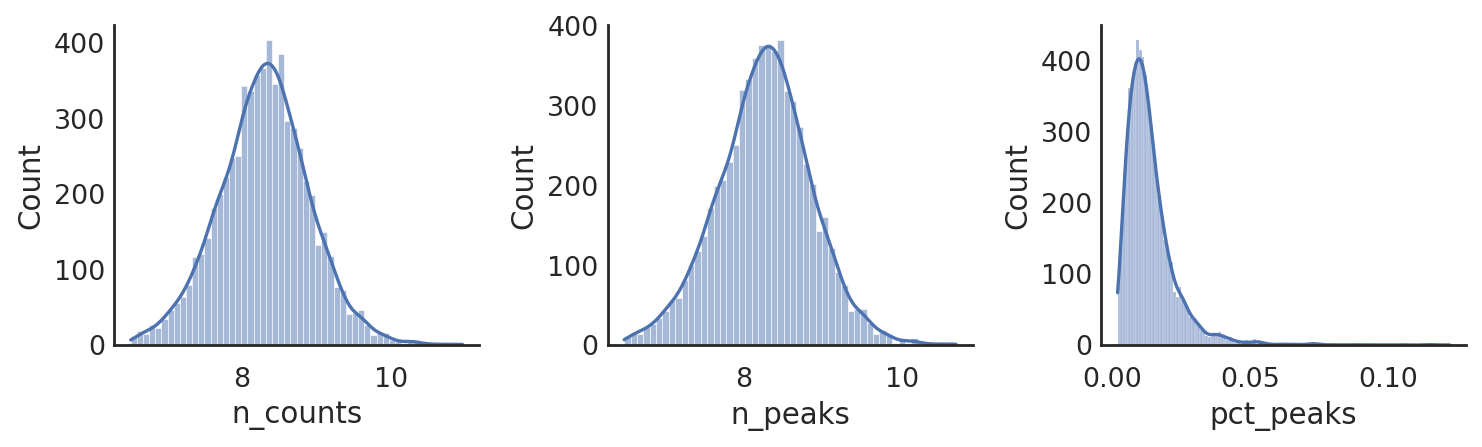

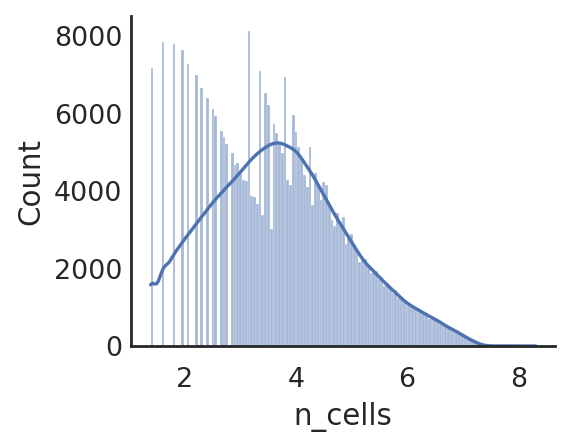

In [14]:
si.pl.hist(adata_CP,list_obs=['n_counts','n_peaks','pct_peaks'], log=True, list_var=['n_cells'])

select peaks (optional)  
It will speed up the trainning process by only keeping peaks associated with top PCs:

```python
si.pp.pca(adata_CP, n_components=40)
si.pl.pca_variance_ratio(adata_CP)
si.pp.select_pcs_features(adata_CP)
```

### select DNA sequences (Optional) 

![title](img/6_dna.png)

DNA sequences such as TF motifs or k-mers can be also encoded into the graph if needed (the red stroke in the graph in above figure).<br>
To scan peaks for kmers and motifs, first write the peak bed files.

In [15]:
si.write_bed(adata_CP, use_top_pcs=False)

"peaks.bed" was written to "result_multiome_shareseq".


Run provided R script “[scan_for_kmers_motifs.R](https://raw.githubusercontent.com/pinellolab/simba/master/R_scripts/scan_for_kmers_motifs.R)” under the result directory (‘mm10.fa’ can be downloaded [here](https://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/mm10.fa.gz))

In [118]:
os.chdir(workdir)

In [119]:
#! wget https://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/mm10.fa.gz
#! gunzip mm10.fa.gz
! wget https://raw.githubusercontent.com/pinellolab/simba/master/R_scripts/scan_for_kmers_motifs.R

--2021-11-10 18:17:18--  https://raw.githubusercontent.com/pinellolab/simba/master/R_scripts/scan_for_kmers_motifs.R
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5767 (5.6K) [text/plain]
Saving to: ‘scan_for_kmers_motifs.R.2’

100%[======================================>] 5,767       --.-K/s   in 0s      

2021-11-10 18:17:18 (13.0 MB/s) - ‘scan_for_kmers_motifs.R.2’ saved [5767/5767]



To run the R script, first we need to [install the required packages](https://github.com/pinellolab/simba/blob/master/R_scripts/README.md). On your enviroment, download dependencies with the following line. <br>
<pre><code>$ conda install r-essentials r-optparse bioconductor-jaspar2020 bioconductor-biostrings bioconductor-tfbstools bioconductor-motifmatchr bioconductor-summarizedexperiment r-doparallel bioconductor-rhdf5 bioconductor-hdf5array </code></pre>


In [121]:
%time
! Rscript scan_for_kmers_motifs.R -i peaks.bed -g mm10.fa -s 'Mus musculus'

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 20 µs
[1] "Converting .bed to .fasta ..."
[1] "Scanning for kmers ..."
[1] "Scanning for TF motifs ..."
[1] "Saving kmer matrix ..."
[1] "Saving motif matrix ..."
[1] "Finished."


In [18]:
os.chdir("../")

In [19]:
adata_PK = si.read_hdf(os.path.join(workdir,'output_kmers_motifs/freq_kmer.h5'),'mat')
adata_PM = si.read_hdf(os.path.join(workdir,'output_kmers_motifs/freq_motif.h5'),'mat')

# convert byte string to string
adata_PK.obs.index = [x.decode('utf-8') for x in adata_PK.obs.index]
adata_PK.var.index = [x.decode('utf-8') for x in adata_PK.var.index]

adata_PM.obs.index = [x.decode('utf-8') for x in adata_PM.obs.index]
adata_PM.var.index = [x.decode('utf-8') for x in adata_PM.var.index]

In [114]:
any(adata_PM.var.index.map(lambda s: "Sox" in s))

True

In [20]:
adata_PK

AnnData object with n_obs × n_vars = 332987 × 4096

In [21]:
adata_PM

AnnData object with n_obs × n_vars = 332987 × 107

In [22]:
si.pp.binarize(adata_PK)
si.pp.binarize(adata_PM)

select kmers and motifs (optional)

```python
si.pp.pca(adata_PK, n_components=30)
si.pp.pca(adata_PM, n_components=30)
si.pp.select_pcs_features(adata_PK, min_elbow=adata_PK.shape[1]/5, S=5)
si.pp.select_pcs_features(adata_PM, min_elbow=adata_PM.shape[1]/5, S=5)
```

## RNA-seq part

### preprocessing

In [23]:
si.pp.filter_genes(adata_CG,min_n_cells=3)

Before filtering: 
6436 cells, 20331 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
6436 cells, 17399 genes


In [24]:
si.pp.cal_qc_rna(adata_CG)

In [25]:
si.pp.normalize(adata_CG,method='lib_size')

In [26]:
si.pp.log_transform(adata_CG)

Optionally, variable gene selection step can be also performed. 

```python
si.pp.select_variable_genes(adata_CG)
si.pl.variable_genes(adata_CG,show_texts=True)
```

This will speed up the training procedure as only variable genes are encoded into the graph. But we won't obtain the embeddings of non-variable genes.

### discretize RNA expression

In [27]:
si.tl.discretize(adata_CG,n_bins=5)

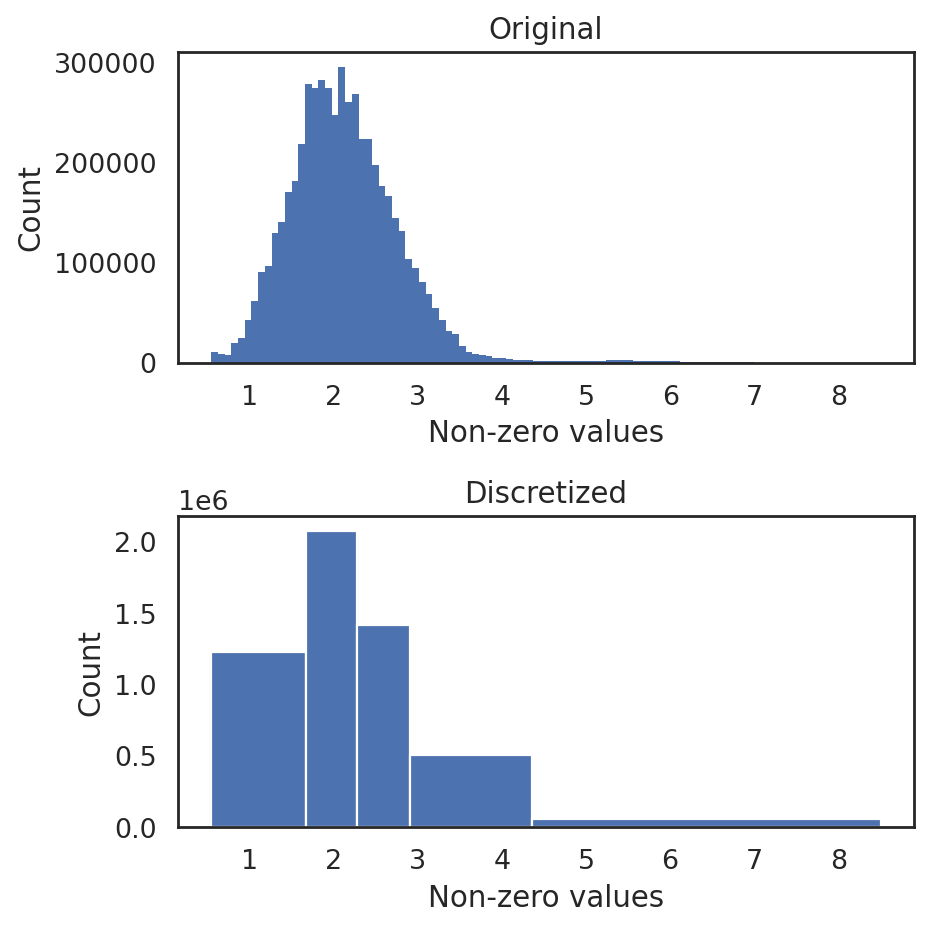

In [28]:
si.pl.discretize(adata_CG,kde=False)

### generate graph

![title](img/4_gengraph.png)

In [29]:
%time
si.tl.gen_graph(list_CP=[adata_CP],
                list_CG=[adata_CG],
                list_PK=[adata_PK],
                list_PM=[adata_PM],
                copy=False,
                use_highly_variable=False,
                use_top_pcs=False,
                dirname='graph0')

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 13.6 µs
relation0: source: C, destination: P
#edges: 29715636
relation1: source: P, destination: M
#edges: 1708726
relation2: source: P, destination: K
#edges: 90598213
relation3: source: C, destination: G
#edges: 1230001
relation4: source: C, destination: G
#edges: 2077455
relation5: source: C, destination: G
#edges: 1413598
relation6: source: C, destination: G
#edges: 503387
relation7: source: C, destination: G
#edges: 57001
Total number of edges: 127304017
Writing graph file "pbg_graph.txt" to "result_multiome_shareseq/pbg/graph0" ...
Finished.


### PBG training

![title](img/4_embed.png)

Before PBG training, let’s take a look at the parameters:

In [30]:
si.settings.pbg_params

{'entity_path': 'result_multiome_shareseq/pbg/graph0/input/entity',
 'edge_paths': ['result_multiome_shareseq/pbg/graph0/input/edge'],
 'checkpoint_path': '',
 'entities': {'C': {'num_partitions': 1},
  'G': {'num_partitions': 1},
  'P': {'num_partitions': 1},
  'K': {'num_partitions': 1},
  'M': {'num_partitions': 1}},
 'relations': [{'name': 'r0',
   'lhs': 'C',
   'rhs': 'P',
   'operator': 'none',
   'weight': 1.0},
  {'name': 'r1', 'lhs': 'P', 'rhs': 'M', 'operator': 'none', 'weight': 0.2},
  {'name': 'r2', 'lhs': 'P', 'rhs': 'K', 'operator': 'none', 'weight': 0.02},
  {'name': 'r3', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 1.0},
  {'name': 'r4', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r5', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'name': 'r6', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
  {'name': 'r7', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 5.0}],
 'dynamic_relations': False,
 'dime

If no parameters need to be adjusted, the training can be simply done with:

```python
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')
```

Here we show how to adjust training-related parameters if needed. In general, weight decay `wd` is the only parameter that might need to be adjusted based on the following pbg metric plots. However, in almost all the cases, the automatically decided `wd` (enabling it by setting `auto_wd=True`) works well.

E.g. we want to change the number of cpus `workers`:

In [34]:
%%time
# modify parameters
dict_config = si.settings.pbg_params.copy()
# dict_config['wd'] = 0.000172
dict_config['workers'] = 12

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model')

Auto-estimated weight decay is 0.000186
`.settings.pbg_params['wd']` has been updated to 0.000186
Converting input data ...
[2021-11-09 23:47:57.214306] Using the 8 relation types given in the config
[2021-11-09 23:47:57.214731] Searching for the entities in the edge files...
[2021-11-09 23:50:26.849806] Entity type C:
[2021-11-09 23:50:26.851783] - Found 6436 entities
[2021-11-09 23:50:26.852153] - Removing the ones with fewer than 1 occurrences...
[2021-11-09 23:50:26.855772] - Left with 6436 entities
[2021-11-09 23:50:26.856135] - Shuffling them...
[2021-11-09 23:50:26.859580] Entity type G:
[2021-11-09 23:50:26.859896] - Found 17399 entities
[2021-11-09 23:50:26.860186] - Removing the ones with fewer than 1 occurrences...
[2021-11-09 23:50:26.867730] - Left with 17399 entities
[2021-11-09 23:50:26.868193] - Shuffling them...
[2021-11-09 23:50:26.879033] Entity type P:
[2021-11-09 23:50:26.879488] - Found 332987 entities
[2021-11-09 23:50:26.879774] - Removing the ones with fewer th

[2021-11-09 23:51:09.331642] - Processed 9100000 edges so far...
[2021-11-09 23:51:09.780776] - Processed 9200000 edges so far...
[2021-11-09 23:51:10.230109] - Processed 9300000 edges so far...
[2021-11-09 23:51:10.678982] - Processed 9400000 edges so far...
[2021-11-09 23:51:11.132443] - Processed 9500000 edges so far...
[2021-11-09 23:51:11.581998] - Processed 9600000 edges so far...
[2021-11-09 23:51:12.030732] - Processed 9700000 edges so far...
[2021-11-09 23:51:12.478939] - Processed 9800000 edges so far...
[2021-11-09 23:51:12.927507] - Processed 9900000 edges so far...
[2021-11-09 23:51:13.375219] - Processed 10000000 edges so far...
[2021-11-09 23:51:13.825916] - Processed 10100000 edges so far...
[2021-11-09 23:51:14.275164] - Processed 10200000 edges so far...
[2021-11-09 23:51:14.724007] - Processed 10300000 edges so far...
[2021-11-09 23:51:15.171647] - Processed 10400000 edges so far...
[2021-11-09 23:51:15.622752] - Processed 10500000 edges so far...
[2021-11-09 23:51:1

[2021-11-09 23:52:05.449364] - Processed 21600000 edges so far...
[2021-11-09 23:52:05.884176] - Processed 21700000 edges so far...
[2021-11-09 23:52:06.319737] - Processed 21800000 edges so far...
[2021-11-09 23:52:06.754512] - Processed 21900000 edges so far...
[2021-11-09 23:52:07.189734] - Processed 22000000 edges so far...
[2021-11-09 23:52:07.625362] - Processed 22100000 edges so far...
[2021-11-09 23:52:08.060178] - Processed 22200000 edges so far...
[2021-11-09 23:52:08.520739] - Processed 22300000 edges so far...
[2021-11-09 23:52:08.956669] - Processed 22400000 edges so far...
[2021-11-09 23:52:09.392764] - Processed 22500000 edges so far...
[2021-11-09 23:52:09.829440] - Processed 22600000 edges so far...
[2021-11-09 23:52:10.265458] - Processed 22700000 edges so far...
[2021-11-09 23:52:10.700970] - Processed 22800000 edges so far...
[2021-11-09 23:52:11.137359] - Processed 22900000 edges so far...
[2021-11-09 23:52:11.573739] - Processed 23000000 edges so far...
[2021-11-0

[2021-11-09 23:52:59.239436] - Processed 34100000 edges so far...
[2021-11-09 23:52:59.654585] - Processed 34200000 edges so far...
[2021-11-09 23:53:00.066931] - Processed 34300000 edges so far...
[2021-11-09 23:53:00.478275] - Processed 34400000 edges so far...
[2021-11-09 23:53:00.891403] - Processed 34500000 edges so far...
[2021-11-09 23:53:01.303942] - Processed 34600000 edges so far...
[2021-11-09 23:53:01.717923] - Processed 34700000 edges so far...
[2021-11-09 23:53:02.143814] - Processed 34800000 edges so far...
[2021-11-09 23:53:02.555654] - Processed 34900000 edges so far...
[2021-11-09 23:53:02.968970] - Processed 35000000 edges so far...
[2021-11-09 23:53:03.381153] - Processed 35100000 edges so far...
[2021-11-09 23:53:03.794370] - Processed 35200000 edges so far...
[2021-11-09 23:53:04.206762] - Processed 35300000 edges so far...
[2021-11-09 23:53:04.619494] - Processed 35400000 edges so far...
[2021-11-09 23:53:05.049168] - Processed 35500000 edges so far...
[2021-11-0

[2021-11-09 23:53:51.158122] - Processed 46600000 edges so far...
[2021-11-09 23:53:51.570837] - Processed 46700000 edges so far...
[2021-11-09 23:53:51.983969] - Processed 46800000 edges so far...
[2021-11-09 23:53:52.397421] - Processed 46900000 edges so far...
[2021-11-09 23:53:52.812331] - Processed 47000000 edges so far...
[2021-11-09 23:53:53.232354] - Processed 47100000 edges so far...
[2021-11-09 23:53:53.645903] - Processed 47200000 edges so far...
[2021-11-09 23:53:54.059782] - Processed 47300000 edges so far...
[2021-11-09 23:53:54.474647] - Processed 47400000 edges so far...
[2021-11-09 23:53:54.888350] - Processed 47500000 edges so far...
[2021-11-09 23:53:55.321908] - Processed 47600000 edges so far...
[2021-11-09 23:53:55.735045] - Processed 47700000 edges so far...
[2021-11-09 23:53:56.147440] - Processed 47800000 edges so far...
[2021-11-09 23:53:56.560012] - Processed 47900000 edges so far...
[2021-11-09 23:53:56.972701] - Processed 48000000 edges so far...
[2021-11-0

[2021-11-09 23:54:43.168014] - Processed 59100000 edges so far...
[2021-11-09 23:54:43.579744] - Processed 59200000 edges so far...
[2021-11-09 23:54:43.996916] - Processed 59300000 edges so far...
[2021-11-09 23:54:44.410122] - Processed 59400000 edges so far...
[2021-11-09 23:54:44.824360] - Processed 59500000 edges so far...
[2021-11-09 23:54:45.237462] - Processed 59600000 edges so far...
[2021-11-09 23:54:45.656905] - Processed 59700000 edges so far...
[2021-11-09 23:54:46.081382] - Processed 59800000 edges so far...
[2021-11-09 23:54:46.506024] - Processed 59900000 edges so far...
[2021-11-09 23:54:46.929800] - Processed 60000000 edges so far...
[2021-11-09 23:54:47.354867] - Processed 60100000 edges so far...
[2021-11-09 23:54:47.774016] - Processed 60200000 edges so far...
[2021-11-09 23:54:48.186809] - Processed 60300000 edges so far...
[2021-11-09 23:54:48.600759] - Processed 60400000 edges so far...
[2021-11-09 23:54:49.013462] - Processed 60500000 edges so far...
[2021-11-0

[2021-11-09 23:55:35.155378] - Processed 71600000 edges so far...
[2021-11-09 23:55:35.566548] - Processed 71700000 edges so far...
[2021-11-09 23:55:35.976538] - Processed 71800000 edges so far...
[2021-11-09 23:55:36.387839] - Processed 71900000 edges so far...
[2021-11-09 23:55:36.802892] - Processed 72000000 edges so far...
[2021-11-09 23:55:37.212749] - Processed 72100000 edges so far...
[2021-11-09 23:55:37.623538] - Processed 72200000 edges so far...
[2021-11-09 23:55:38.035286] - Processed 72300000 edges so far...
[2021-11-09 23:55:38.448335] - Processed 72400000 edges so far...
[2021-11-09 23:55:38.859593] - Processed 72500000 edges so far...
[2021-11-09 23:55:39.270785] - Processed 72600000 edges so far...
[2021-11-09 23:55:39.690963] - Processed 72700000 edges so far...
[2021-11-09 23:55:40.102350] - Processed 72800000 edges so far...
[2021-11-09 23:55:40.512790] - Processed 72900000 edges so far...
[2021-11-09 23:55:40.924755] - Processed 73000000 edges so far...
[2021-11-0

[2021-11-09 23:56:26.866512] - Processed 84100000 edges so far...
[2021-11-09 23:56:27.284232] - Processed 84200000 edges so far...
[2021-11-09 23:56:27.697184] - Processed 84300000 edges so far...
[2021-11-09 23:56:28.109324] - Processed 84400000 edges so far...
[2021-11-09 23:56:28.524511] - Processed 84500000 edges so far...
[2021-11-09 23:56:28.937710] - Processed 84600000 edges so far...
[2021-11-09 23:56:29.349914] - Processed 84700000 edges so far...
[2021-11-09 23:56:29.771433] - Processed 84800000 edges so far...
[2021-11-09 23:56:30.182885] - Processed 84900000 edges so far...
[2021-11-09 23:56:30.593237] - Processed 85000000 edges so far...
[2021-11-09 23:56:31.006739] - Processed 85100000 edges so far...
[2021-11-09 23:56:31.428195] - Processed 85200000 edges so far...
[2021-11-09 23:56:31.838968] - Processed 85300000 edges so far...
[2021-11-09 23:56:32.250260] - Processed 85400000 edges so far...
[2021-11-09 23:56:32.667230] - Processed 85500000 edges so far...
[2021-11-0

[2021-11-09 23:57:18.524625] - Processed 96600000 edges so far...
[2021-11-09 23:57:18.936777] - Processed 96700000 edges so far...
[2021-11-09 23:57:19.347365] - Processed 96800000 edges so far...
[2021-11-09 23:57:19.761049] - Processed 96900000 edges so far...
[2021-11-09 23:57:20.171891] - Processed 97000000 edges so far...
[2021-11-09 23:57:20.601636] - Processed 97100000 edges so far...
[2021-11-09 23:57:21.013528] - Processed 97200000 edges so far...
[2021-11-09 23:57:21.425274] - Processed 97300000 edges so far...
[2021-11-09 23:57:21.836198] - Processed 97400000 edges so far...
[2021-11-09 23:57:22.250288] - Processed 97500000 edges so far...
[2021-11-09 23:57:22.661122] - Processed 97600000 edges so far...
[2021-11-09 23:57:23.073578] - Processed 97700000 edges so far...
[2021-11-09 23:57:23.493504] - Processed 97800000 edges so far...
[2021-11-09 23:57:23.905258] - Processed 97900000 edges so far...
[2021-11-09 23:57:24.316613] - Processed 98000000 edges so far...
[2021-11-0

[2021-11-09 23:58:09.354392] - Processed 108900000 edges so far...
[2021-11-09 23:58:09.766454] - Processed 109000000 edges so far...
[2021-11-09 23:58:10.180890] - Processed 109100000 edges so far...
[2021-11-09 23:58:10.592940] - Processed 109200000 edges so far...
[2021-11-09 23:58:11.024168] - Processed 109300000 edges so far...
[2021-11-09 23:58:11.435876] - Processed 109400000 edges so far...
[2021-11-09 23:58:11.846990] - Processed 109500000 edges so far...
[2021-11-09 23:58:12.260400] - Processed 109600000 edges so far...
[2021-11-09 23:58:12.675043] - Processed 109700000 edges so far...
[2021-11-09 23:58:13.085675] - Processed 109800000 edges so far...
[2021-11-09 23:58:13.507095] - Processed 109900000 edges so far...
[2021-11-09 23:58:13.920064] - Processed 110000000 edges so far...
[2021-11-09 23:58:14.332610] - Processed 110100000 edges so far...
[2021-11-09 23:58:14.754712] - Processed 110200000 edges so far...
[2021-11-09 23:58:15.170495] - Processed 110300000 edges so fa

[2021-11-09 23:59:03.031430] - Processed 121200000 edges so far...
[2021-11-09 23:59:03.441738] - Processed 121300000 edges so far...
[2021-11-09 23:59:03.850011] - Processed 121400000 edges so far...
[2021-11-09 23:59:04.259075] - Processed 121500000 edges so far...
[2021-11-09 23:59:04.666931] - Processed 121600000 edges so far...
[2021-11-09 23:59:05.074034] - Processed 121700000 edges so far...
[2021-11-09 23:59:05.484436] - Processed 121800000 edges so far...
[2021-11-09 23:59:05.891634] - Processed 121900000 edges so far...
[2021-11-09 23:59:06.302159] - Processed 122000000 edges so far...
[2021-11-09 23:59:06.713048] - Processed 122100000 edges so far...
[2021-11-09 23:59:07.125023] - Processed 122200000 edges so far...
[2021-11-09 23:59:07.534834] - Processed 122300000 edges so far...
[2021-11-09 23:59:07.947898] - Processed 122400000 edges so far...
[2021-11-09 23:59:08.358636] - Processed 122500000 edges so far...
[2021-11-09 23:59:08.769265] - Processed 122600000 edges so fa

> If `wd` is specified by users instead of being automatically decided, then make sure to update it in simba setting:
```python
si.settings.pbg_params = dict_config.copy()
```

The trained result can be loaded in with the following steps:

By default, it's using the current training result stored in `.setting.pbg_params`
```python
# load in graph ('graph0') info
si.load_graph_stats()
# load in model info for ('graph0')
si.load_pbg_config()
```
Users can also specify different pathss
```python
# load in graph ('graph0') info
si.load_graph_stats(path='./result_multiome_shareseq/pbg/graph0/')
# load in model info for ('graph0')
si.load_pbg_config(path='./result_multiome_shareseq/pbg/graph0/model/')
```

Plotting training metrics to make sure the model is not overfitting

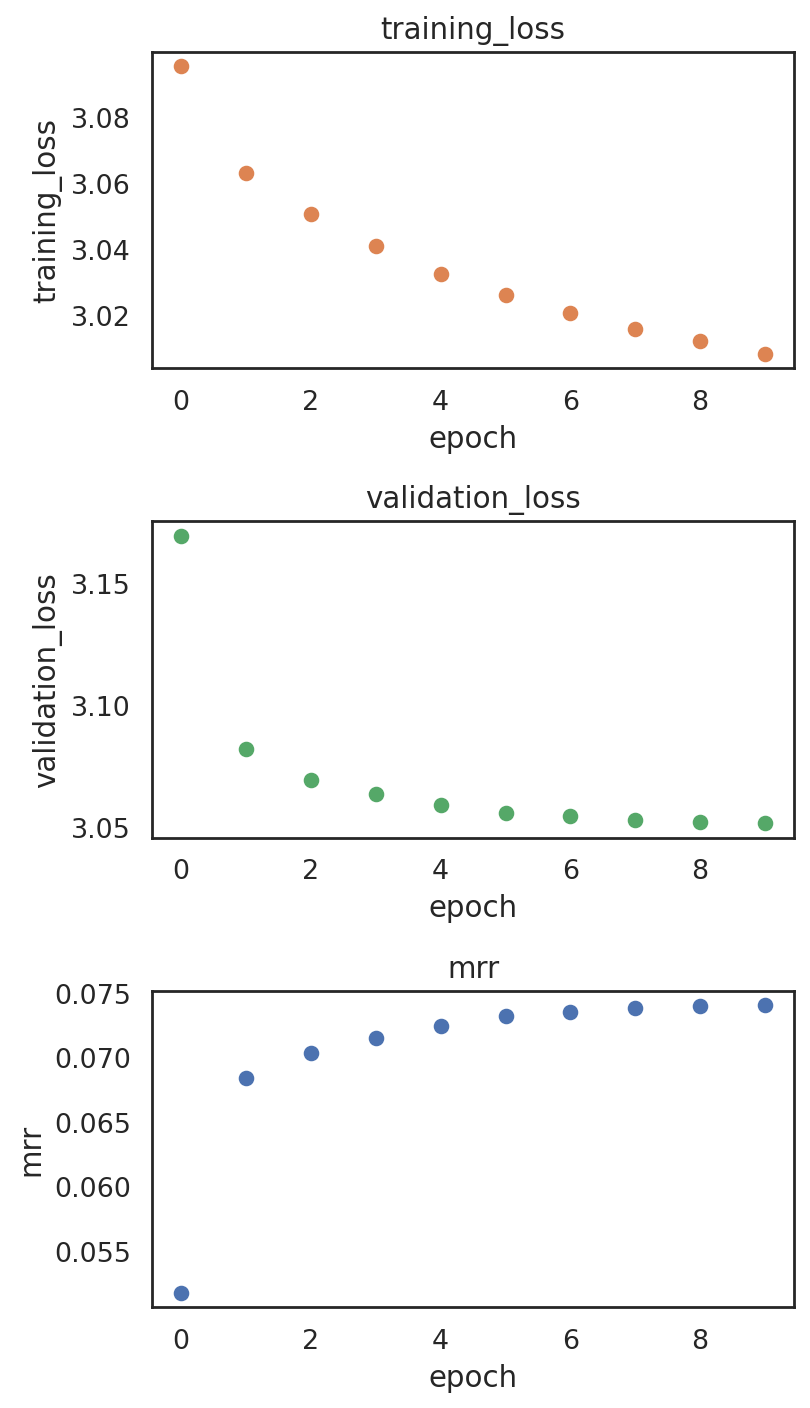

In [36]:
si.pl.pbg_metrics(fig_ncol=1)

### post-training analysis

In [37]:
palette_celltype={'TAC-1':'#F8D856', 'TAC-2':'#F1B044', 'IRS':'#C37777', 
              'Medulla':'#897a74','Hair Shaft-cuticle.cortex':"#d6a780"}

In [38]:
dict_adata = si.read_embedding()

In [39]:
dict_adata

{'G': AnnData object with n_obs × n_vars = 17399 × 50,
 'P': AnnData object with n_obs × n_vars = 332987 × 50,
 'C': AnnData object with n_obs × n_vars = 6436 × 50,
 'K': AnnData object with n_obs × n_vars = 4096 × 50,
 'M': AnnData object with n_obs × n_vars = 107 × 50}

In [40]:
adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes
adata_P = dict_adata['P']  # embeddings for peaks
adata_K = dict_adata['K']  # embeddings for kmers
adata_M = dict_adata['M']  # embeddings for motifs

#### to distinguish TF motif names from gene names in this case
adata_M.obs.index = 'M_'+adata_M.obs.index

In [41]:
adata_C

AnnData object with n_obs × n_vars = 6436 × 50

In [42]:
adata_G

AnnData object with n_obs × n_vars = 17399 × 50

In [43]:
adata_P

AnnData object with n_obs × n_vars = 332987 × 50

In [44]:
adata_K

AnnData object with n_obs × n_vars = 4096 × 50

In [45]:
adata_M

AnnData object with n_obs × n_vars = 107 × 50

visualize embeddings of cells

In [46]:
## Add annotation of celltypes (optional)
adata_C.obs['celltype'] = adata_CG[adata_C.obs_names,:].obs['celltype'].copy()
adata_C

AnnData object with n_obs × n_vars = 6436 × 50
    obs: 'celltype'

In [47]:
si.tl.umap(adata_C,n_neighbors=15,n_components=2)

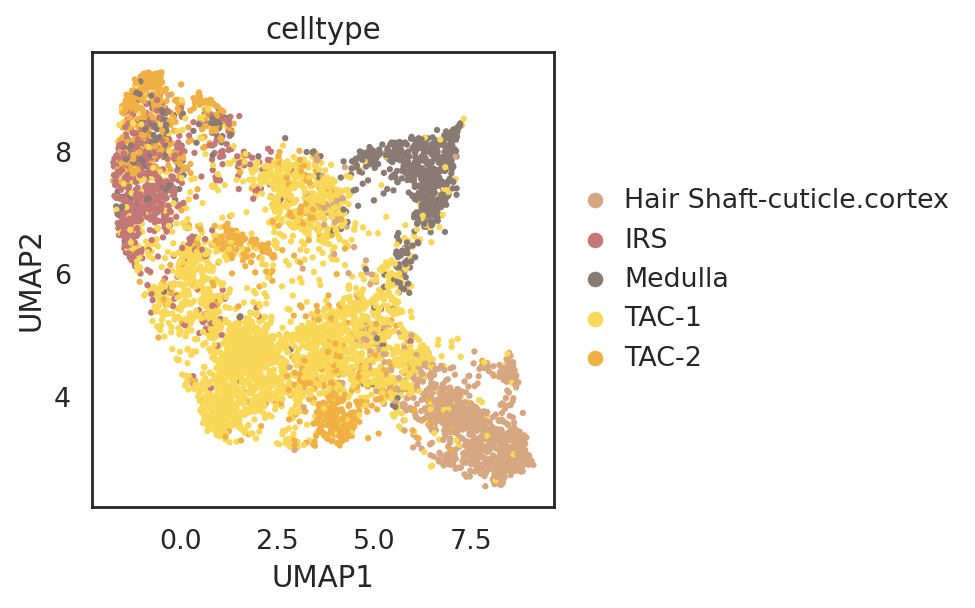

In [48]:
si.pl.umap(adata_C,
           color=['celltype'],dict_palette={'celltype': palette_celltype},
           fig_size=(6,4),
           drawing_order='random')

visualize embeddings of cells and genes

In [49]:
adata_all_CG = si.tl.embed(adata_ref=adata_C,
                           list_adata_query=[adata_G])

Performing softmax transformation for query data 0;


In [50]:
## add annotations of all entities
adata_all_CG.obs['entity_anno'] = ""
adata_all_CG.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all_CG.obs.loc[adata_C.obs_names, 'celltype'].tolist()
adata_all_CG.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'

adata_all_CG.obs.head()

,celltype,id_dataset,entity_anno
Trial60.skin.R1.21.R2.67.R3.68.P1.56,TAC-2,ref,TAC-2
Trial60.skin.R1.02.R2.40.R3.43.P1.55,TAC-1,ref,TAC-1
Trial60.skin.R1.51.R2.79.R3.79.P1.55,Medulla,ref,Medulla
Trial60.skin.R1.56.R2.82.R3.59.P1.54,IRS,ref,IRS
Trial60.skin.R1.37.R2.13.R3.88.P1.55,Hair Shaft-cuticle.cortex,ref,Hair Shaft-cuticle.cortex


In [51]:
si.tl.umap(adata_all_CG,n_neighbors=15,n_components=2)

In [52]:
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "#607e95"

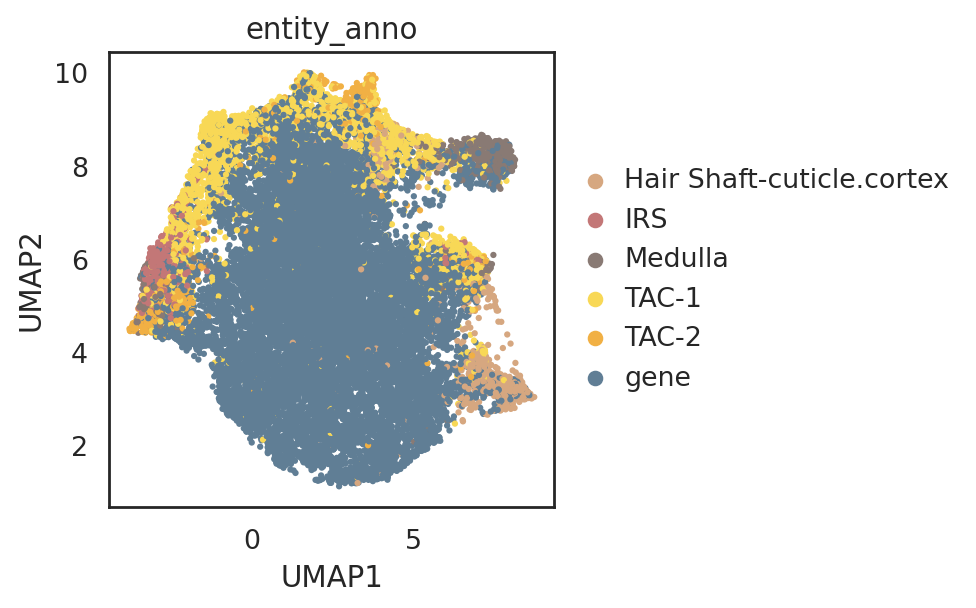

In [53]:
si.pl.umap(adata_all_CG,
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(6,4),
           drawing_order='random')

In [54]:
#some marker genes from the original study
marker_genes = ['Wnt3','Top2a','Shh','Krt27','Foxq1', 'Krt31','Krt71', 'Lef1', 'Hoxc13']

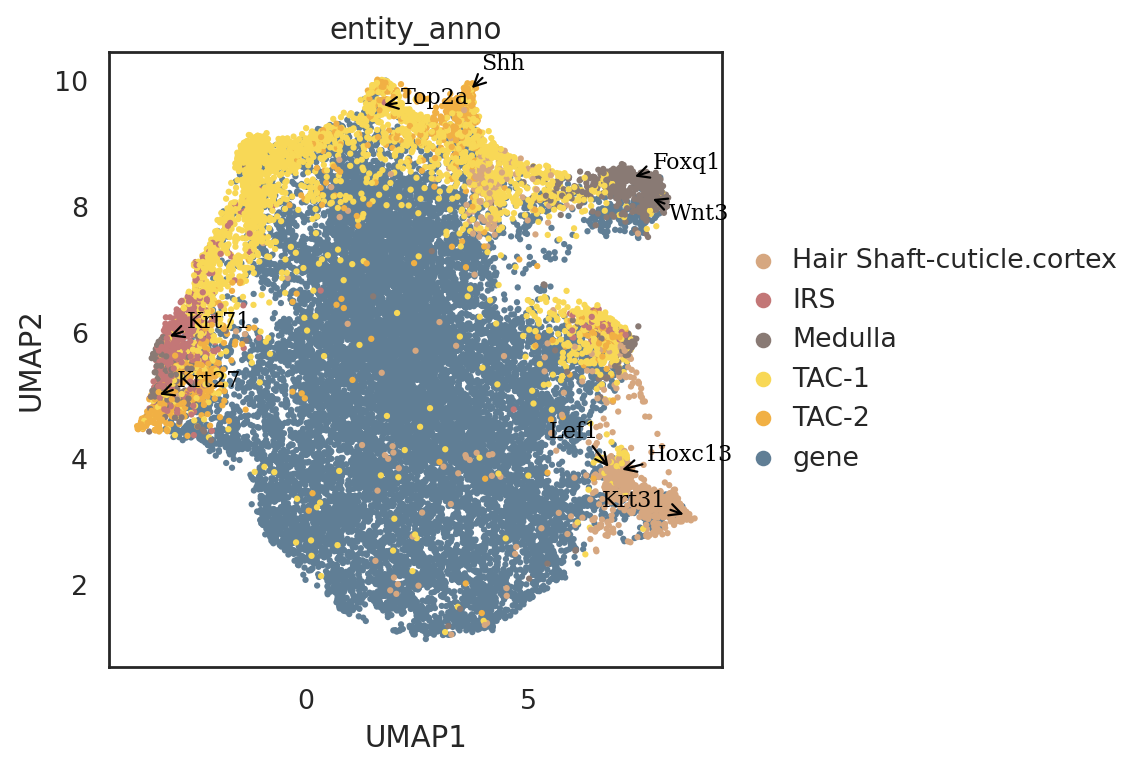

In [55]:
si.pl.umap(adata_all_CG[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(7,5),
           texts=marker_genes, 
           text_expand=(2,1.5),
           show_texts=True,
           drawing_order='original')

visualize embeddings of all entities including cells, genes, motifs, kmers, and peaks

In [56]:
adata_all = si.tl.embed(adata_ref=adata_C,
                        list_adata_query=[adata_G, adata_M, adata_K, adata_P])

Performing softmax transformation for query data 0;
Performing softmax transformation for query data 1;
Performing softmax transformation for query data 2;
Performing softmax transformation for query data 3;


In [57]:
## add annotations of all entities
adata_all.obs['entity_anno'] = ""
adata_all.obs.loc[adata_C.obs_names, 'entity_anno'] = adata_all.obs.loc[adata_C.obs_names, 'celltype'].tolist()
adata_all.obs.loc[adata_G.obs_names, 'entity_anno'] = 'gene'
adata_all.obs.loc[adata_P.obs_names, 'entity_anno'] = 'peak'
adata_all.obs.loc[adata_K.obs_names, 'entity_anno'] = 'kmer'
adata_all.obs.loc[adata_M.obs_names, 'entity_anno'] = 'motif'

adata_all.obs.head()

,celltype,id_dataset,entity_anno
Trial60.skin.R1.21.R2.67.R3.68.P1.56,TAC-2,ref,TAC-2
Trial60.skin.R1.02.R2.40.R3.43.P1.55,TAC-1,ref,TAC-1
Trial60.skin.R1.51.R2.79.R3.79.P1.55,Medulla,ref,Medulla
Trial60.skin.R1.56.R2.82.R3.59.P1.54,IRS,ref,IRS
Trial60.skin.R1.37.R2.13.R3.88.P1.55,Hair Shaft-cuticle.cortex,ref,Hair Shaft-cuticle.cortex


In [58]:
si.tl.umap(adata_all,n_neighbors=50,n_components=2,n_jobs=20)

In [59]:
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "#607e95"
palette_entity_anno['kmer'] = "#94b1b7"
palette_entity_anno['motif'] = "#92ba79"
palette_entity_anno['peak'] = "#e5c2c8"

Trying to set attribute `.uns` of view, copying.


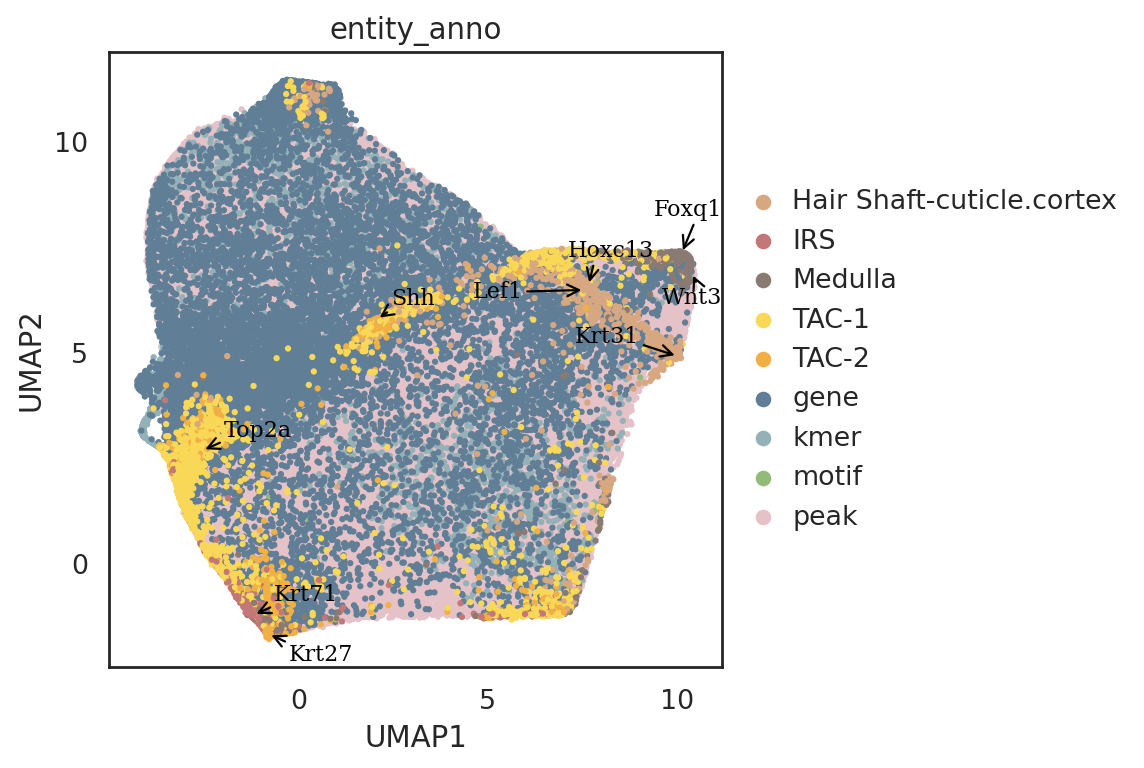

In [60]:
si.pl.umap(adata_all[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           fig_size=(7,5),
           drawing_order='original',
           texts=marker_genes,
           text_expand=(2,2),
           show_texts=True)

SIMBA metrics

In [61]:
# genes
adata_cmp_CG = si.tl.compare_entities(adata_ref=adata_C,
                                      adata_query=adata_G)

# motifs
adata_cmp_CM = si.tl.compare_entities(adata_ref=adata_C,
                                      adata_query=adata_M)

# peaks
adata_cmp_CP = si.tl.compare_entities(adata_ref=adata_C,
                                      adata_query=adata_P)

In [108]:
any(adata_cmp_CM.var.index.map(lambda s: "Hoxc13" in s))

False

In [105]:
adata_cmp_CM.var.index

Index(['M_Sox11', 'M_Smad4', 'M_Ptf1a(var.3)', 'M_Sox5', 'M_Dux',
       'M_Nr1h3_Rxra', 'M_Dlx4', 'M_Ascl2', 'M_Alx4', 'M_Creb3l2',
       ...
       'M_Hand1_Tcf3', 'M_Sox17', 'M_Foxl2', 'M_Crx', 'M_Ebf2', 'M_Plagl1',
       'M_Tcf21', 'M_Mecom', 'M_Hoxa11', 'M_Alx1'],
      dtype='object', length=107)

In [69]:
# rename TF motifs and peaks shorter names
import pandas as pd

adata_cmp_CM.var.index = \
pd.Series(adata_cmp_CM.var.index).replace(
    to_replace=['M_ENSMUSG00000027985_LINE1723_Lef1_D', 'M_ENSMUSG00000001655_LINE1151_Hoxc13_D'], 
    value=['TF_Lef1', 'TF_Hoxc13'])
adata_cmp_CP.var.index = \
pd.Series(adata_cmp_CP.var.index).replace(
    to_replace=['chr3_131018470_131018770', 'chr3_131104928_131105228', 'chr3_131177880_131178180', 'chr3_131212270_131212570',
                'chr15_102832980_102833280', 'chr15_102855927_102856227'], 
    value=['Peak1(Lef1)', 'Peak2(Lef1)', 'Peak3(Lef1)', 'Peak4(Lef1)',
           'Peak1(Hoxc13)', 'Peak2(Hoxc13)'])

adata_all.obs.index = \
pd.Series(adata_all.obs.index).replace(
    to_replace=['M_ENSMUSG00000027985_LINE1723_Lef1_D', 'M_ENSMUSG00000001655_LINE1151_Hoxc13_D', 
                'chr3_131018470_131018770', 'chr3_131104928_131105228', 'chr3_131177880_131178180', 'chr3_131212270_131212570',
                'chr15_102832980_102833280', 'chr15_102855927_102856227'], 
    value=['TF_Lef1', 'TF_Hoxc13',
           'Peak1(Lef1)', 'Peak2(Lef1)', 'Peak3(Lef1)', 'Peak4(Lef1)',
           'Peak1(Hoxc13)', 'Peak2(Hoxc13)'])

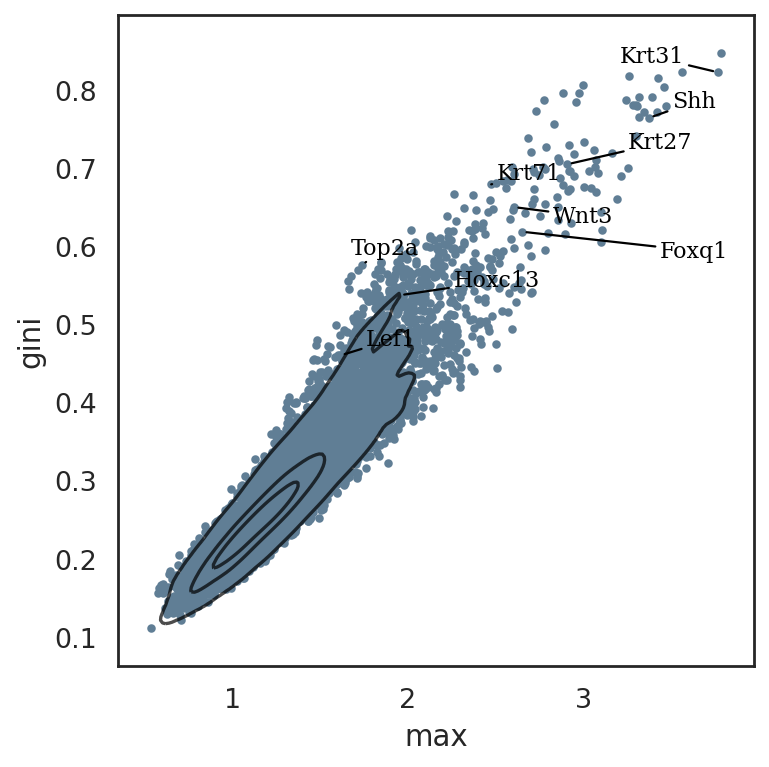

In [63]:
si.pl.entity_metrics(adata_cmp_CG,
                     x='max',
                     y='gini',
                     show_texts=True,
                     show_cutoff=False,
                     show_contour=True,
                     c='#607e95',
                     texts=marker_genes,
                     text_expand=(2,1.5))

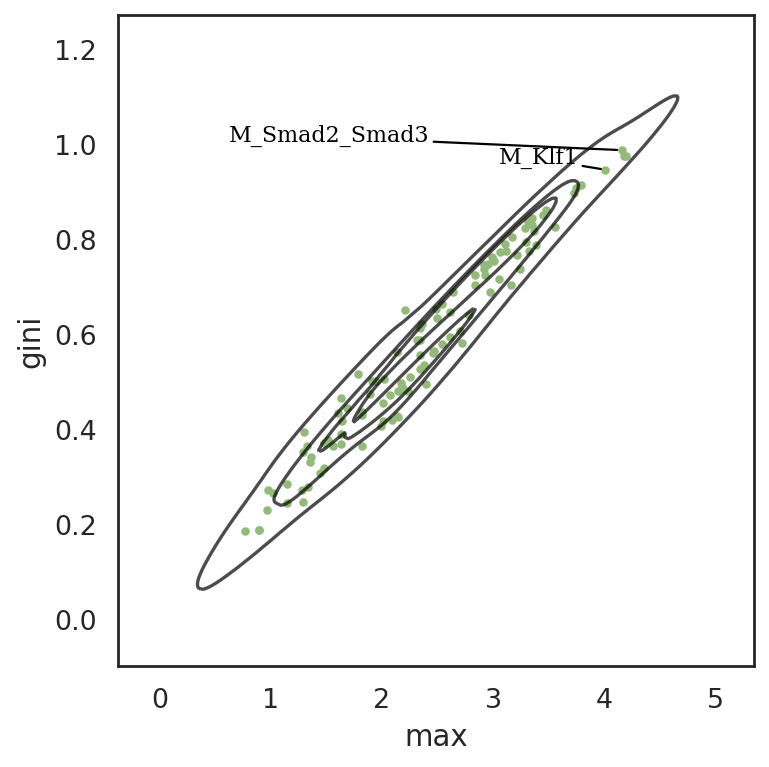

In [84]:
si.pl.entity_metrics(adata_cmp_CM,
                     x='max',
                     y='gini',
                     show_texts=True,
                     show_cutoff=False,
                     show_contour=True,
                     c='#92ba79',
                     texts=["M_Klf1", 'M_Smad2_Smad3'],
                     text_expand=(2,1.5))

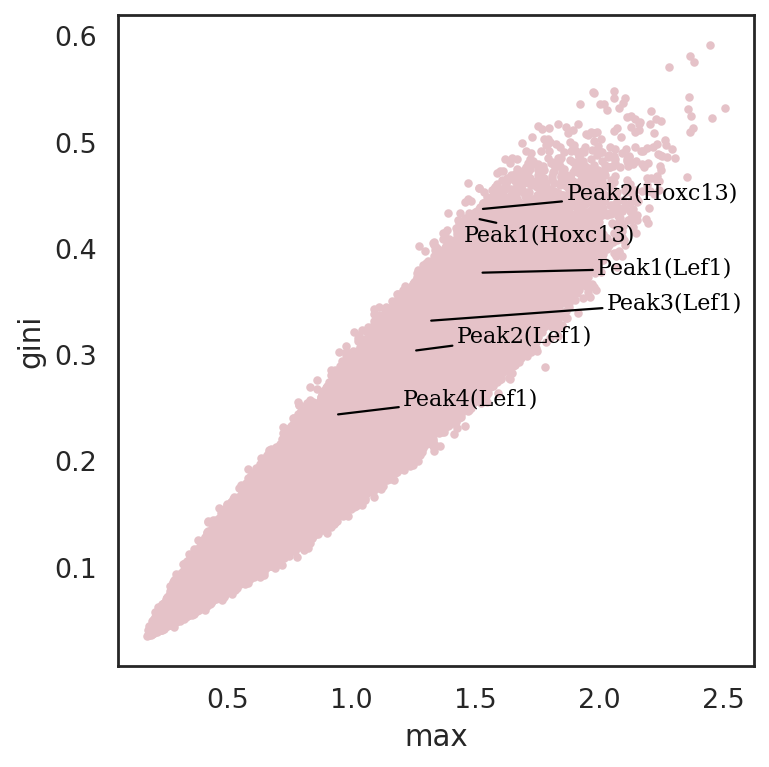

In [71]:
si.pl.entity_metrics(adata_cmp_CP,
                     x='max',
                     y='gini',
                     show_texts=True,
                     show_cutoff=False,
                     show_contour=False,
                     texts=['Peak1(Lef1)', 'Peak2(Lef1)', 'Peak3(Lef1)', 'Peak4(Lef1)',
                            'Peak1(Hoxc13)', 'Peak2(Hoxc13)'],
                     text_expand=(2,1.5),
                     c='#e5c2c8')

only visulize the embeddings of cells and cell-type specific features 

In [85]:
genes_selected = adata_cmp_CG.var[(adata_cmp_CG.var['max']>1.5) & (adata_cmp_CG.var['gini']>0.35)].index.tolist()
len(genes_selected)

2006

In [86]:
motifs_selected = adata_cmp_CM.var[(adata_cmp_CM.var['max']>3) & (adata_cmp_CM.var['gini']>0.7)].index.tolist()
len(motifs_selected)

28

In [89]:
# The union of top 1000 neighbor peaks of all marker genes and TF motifs
query_result = si.tl.query(adata_all,
                           obsm=None,
                           entity=marker_genes + ['M_Klf1','M_Smad2_Smad3'],
                           k=1000,use_radius=False,
                           anno_filter='entity_anno', 
                           filters=['peak'])
print(query_result.shape)
query_result.head()
peaks_selected = list(query_result.index.unique())
len(peaks_selected)

(11000, 5)


8534

In [90]:
adata_all_selected = adata_all[adata_C.obs_names.to_list() 
                               + genes_selected 
                               + motifs_selected 
                               + peaks_selected, ].copy()

In [91]:
si.tl.umap(adata_all_selected,n_neighbors=50,n_components=2)

Trying to set attribute `.uns` of view, copying.


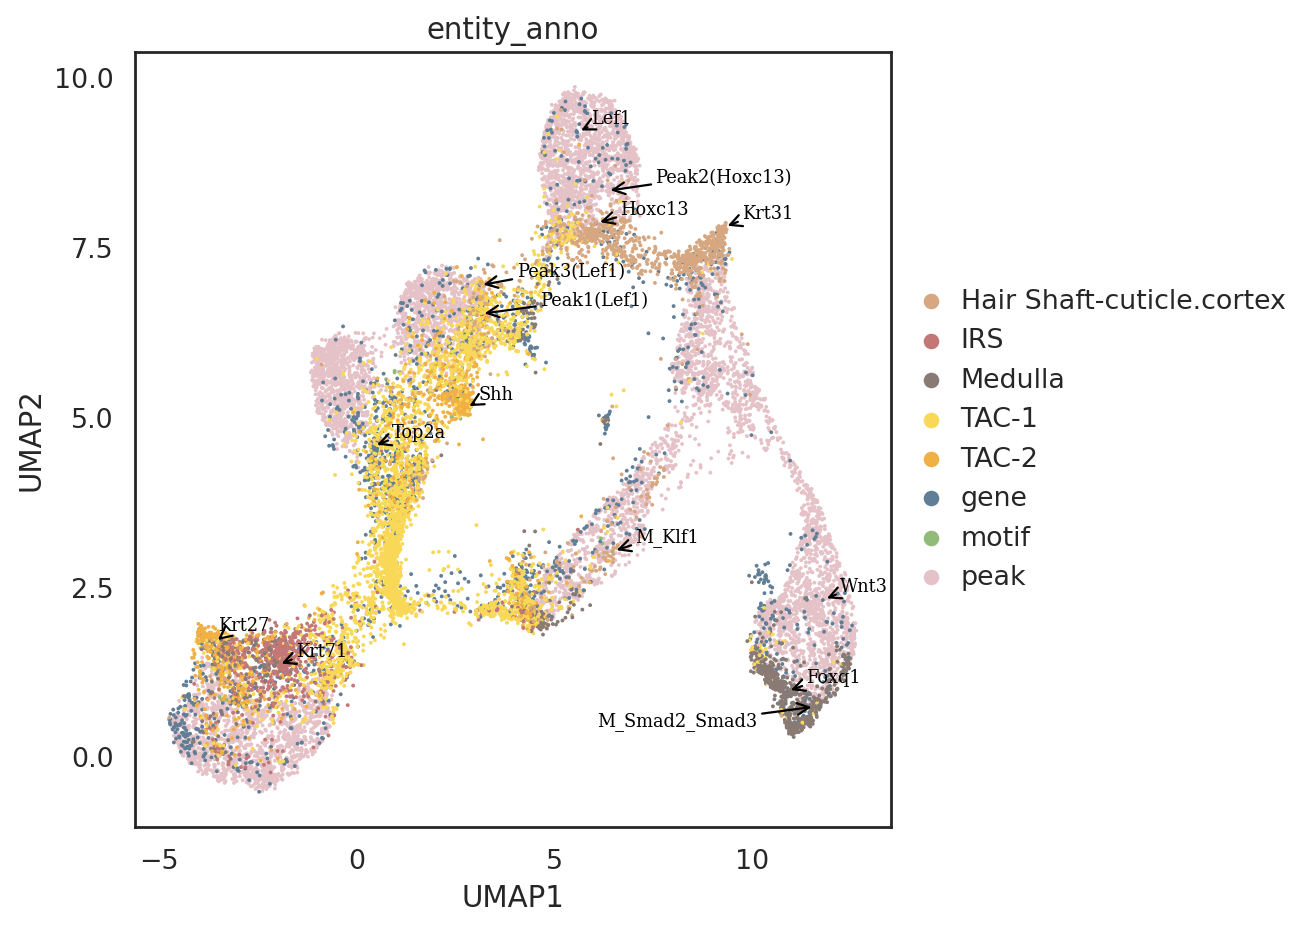

In [96]:
si.pl.umap(adata_all_selected[::-1,],
           color=['entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           text_size=8,
           fig_size=(8,6),
           size=3,
           drawing_order='original',
           texts=marker_genes \
                 + ['M_Klf1','M_Smad2_Smad3'] \
                 + ['Peak1(Lef1)', 'Peak3(Lef1)', 
                     'Peak2(Hoxc13)'],
           text_expand=(2,1.5),
           show_texts=True)

### save results

In [97]:
# change shorter names back to the orignal names
adata_cmp_CM.var.index = \
pd.Series(adata_cmp_CM.var.index).replace(
    to_replace =['TF_Lef1', 'TF_Hoxc13'],
    value = ['M_ENSMUSG00000027985_LINE1723_Lef1_D', 'M_ENSMUSG00000001655_LINE1151_Hoxc13_D'])
adata_cmp_CP.var.index = \
pd.Series(adata_cmp_CP.var.index).replace(
    to_replace = ['Peak1(Lef1)', 'Peak2(Lef1)', 'Peak3(Lef1)', 'Peak4(Lef1)', 'Peak1(Hoxc13)', 'Peak2(Hoxc13)'],
    value = ['chr3_131018470_131018770', 'chr3_131104928_131105228', 'chr3_131177880_131178180', 'chr3_131212270_131212570',
                'chr15_102832980_102833280', 'chr15_102855927_102856227'])

adata_all.obs.index = \
pd.Series(adata_all.obs.index).replace(
    to_replace=['TF_Lef1', 'TF_Hoxc13',
                'Peak1(Lef1)', 'Peak2(Lef1)', 'Peak3(Lef1)', 'Peak4(Lef1)',
                'Peak1(Hoxc13)', 'Peak2(Hoxc13)'], 
    value=['M_ENSMUSG00000027985_LINE1723_Lef1_D', 'M_ENSMUSG00000001655_LINE1151_Hoxc13_D', 
           'chr3_131018470_131018770', 'chr3_131104928_131105228', 'chr3_131177880_131178180', 'chr3_131212270_131212570',
           'chr15_102832980_102833280', 'chr15_102855927_102856227'])


adata_CG.write(os.path.join(workdir,'adata_CG.h5ad'))
adata_CP.write(os.path.join(workdir,'adata_CP.h5ad'))
adata_PM.write(os.path.join(workdir,'adata_PM.h5ad'))
adata_PK.write(os.path.join(workdir,'adata_PK.h5ad'))

adata_C.write(os.path.join(workdir,'adata_C.h5ad'))
adata_G.write(os.path.join(workdir,'adata_G.h5ad'))
adata_P.write(os.path.join(workdir,'adata_P.h5ad'))
adata_K.write(os.path.join(workdir,'adata_K.h5ad'))
adata_M.write(os.path.join(workdir,'adata_M.h5ad'))

adata_all_CG.write(os.path.join(workdir,'adata_all_CG.h5ad'))
adata_all.write(os.path.join(workdir,'adata_all.h5ad'))
adata_all_selected.write(os.path.join(workdir,'adata_all_selected.h5ad'))

adata_cmp_CG.write(os.path.join(workdir,'adata_cmp_CG.h5ad'))
adata_cmp_CM.write(os.path.join(workdir,'adata_cmp_CM.h5ad'))
adata_cmp_CP.write(os.path.join(workdir,'adata_cmp_CP.h5ad'))

/PHShome/jr1025/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'id_dataset' as categorical
/PHShome/jr1025/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'entity_anno' as categorical
/PHShome/jr1025/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering

Read back anndata objects

```python
adata_CG = si.read_h5ad(os.path.join(workdir,'adata_CG.h5ad'))
adata_CP = si.read_h5ad(os.path.join(workdir,'adata_CP.h5ad'))
adata_PM = si.read_h5ad(os.path.join(workdir,'adata_PM.h5ad'))
adata_PK = si.read_h5ad(os.path.join(workdir,'adata_PK.h5ad'))

adata_C = si.read_h5ad(os.path.join(workdir,'adata_C.h5ad'))
adata_G = si.read_h5ad(os.path.join(workdir,'adata_G.h5ad'))
adata_P = si.read_h5ad(os.path.join(workdir,'adata_P.h5ad'))
adata_K = si.read_h5ad(os.path.join(workdir,'adata_K.h5ad'))
adata_M = si.read_h5ad(os.path.join(workdir,'adata_M.h5ad'))

adata_all_CG = si.read_h5ad(os.path.join(workdir,'adata_all_CG.h5ad'))
adata_all = si.read_h5ad(os.path.join(workdir,'adata_all.h5ad'))
adata_all_selected = si.read_h5ad(os.path.join(workdir,'adata_all_selected.h5ad'))

adata_cmp_CG = si.read_h5ad(os.path.join(workdir,'adata_cmp_CG.h5ad'))
adata_cmp_CM = si.read_h5ad(os.path.join(workdir,'adata_cmp_CM.h5ad'))
adata_cmp_CP = si.read_h5ad(os.path.join(workdir,'adata_cmp_CP.h5ad'))
```